### Goals
- How to make up some data that we can apply PCA to.
- How to use the __PCA()__ function from sklearn to do PCA.
- How to determine how much variation each principal component accounts for.
- How to draw a fancy PCA graph using matplotlib.
- How to examine the loading scores to determine what variables have the largest effect on the graph.

In [1]:
import pandas as pd # makes it easy to manipulate data
import numpy as np # allow us to generate random numbers and do other mathy things
import random as rd # useful for generating an example dataset
from sklearn.decomposition import PCA # PCA function
from sklearn import preprocessing # gives us functions for scaling the data before performing PCA
import matplotlib.pyplot as plt # to plot fancy graphs

# generate a sample dataset
genes = ['gene' + str(i) for i in range(1,101)]

# create arrays of sample names
wt = ['wt' + str(i) for i in range(1,6)]
ko = ['ko' + str(i) for i in range(1,6)]

# create a Dataframe to store made up data
data = pd.DataFrame(columns=[*wt, *ko], index=genes)


# for each gene in the index (i.e. gene1, gene2, ...gene100),
# we create 5 values for the "wt" samples and 5 values for the "ko" samples.
for gene in data.index:
    # made up data comes from two poisson distributions
    # for each gene, we select new mean for the poisson distribution(vary between 10-1000)
    data.loc[gene, 'wt1':'wt5'] = np.random.poisson(lam=rd.randrange(10,1000), size=5)
    data.loc[gene, 'ko1':'ko5'] = np.random.poisson(lam=rd.randrange(10,1000), size=5)
    
print(data.head())

       wt1  wt2  wt3  wt4  wt5  ko1  ko2  ko3  ko4  ko5
gene1  536  536  522  557  544  319  306  310  320  305
gene2  107  106   83  111  108  204  215  205  219  238
gene3  967  934  977  943  911  463  434  413  415  409
gene4   71   60   74   67   37  595  606  612  606  592
gene5  717  693  714  701  678  902  962  949  885  953


In [2]:
# return dimensions
data.shape

(100, 10)

Before we do PCA, we have to center and scale the data.
- After centering, the average value for each gene will be 0
- After scaling the standard deviation for the values for each gene will be 1.

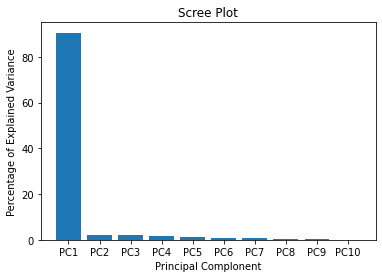

In [3]:
# center and scaling the data
scaled_data = preprocessing.scale(data.T)

pca = PCA() # create PCA object
pca.fit(scaled_data) # calculate loading scores and the variation each principal component accounts for
pca_data = pca.transform(scaled_data) # generate coordinates for a PCA graph based on the loading scores and the scaled data

# calculate the percentage of variation that each principal component accounts for
per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)
# create labels for the scree plot
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

# create a bar plot
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Complonent')
plt.title('Scree Plot')
plt.show()

To draw a PCA plot, we'll first put the new coordinates, created by pca.transform(scaled.data), into a nice matrix where the rows have sample labels and the columns have PC labels.

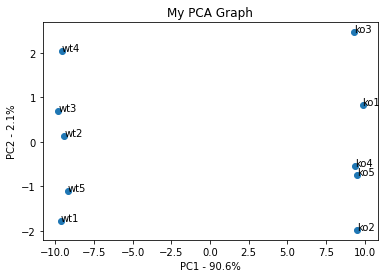

In [4]:
# matrix of sample and PC
pca_df = pd.DataFrame(pca_data, index=[*wt, *ko], columns=labels)

# draw a scatter plot
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))

# add sample names to graph
for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))
    
plt.show()

- The "wt" are clustered on right side, suggesting that they are correlated with each other.
- The "ko" are clustered on left side, suggesting that they are correlated with each other.
- And the separation of the two clusters along the x-axis suggests that "wt" samples are very different from "ko" samples.
 
Let's look at the loading scores for PC1 to determine which genes had the largest influence on separating the two clusters along the x-axis.

In [5]:
# Creating a "Series" object with the loading scores in PC1
# the PCs are zero-indexed, so PC1 = 0
loading_scores = pd.Series(pca.components_[0], index=genes)
# sort the loading scores
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)

# getting the names of the top 10 indexes
top_10_genes = sorted_loading_scores[0:10].index.values

# top 10 gene names and their corresponding loading scores
print(loading_scores[top_10_genes])

gene31   -0.104983
gene51    0.104975
gene39   -0.104966
gene54    0.104919
gene90   -0.104900
gene13   -0.104895
gene28   -0.104888
gene77   -0.104873
gene24   -0.104868
gene75   -0.104862
dtype: float64


And these values are super similar, so a lot of genes played a role in separating the samples, rather than just one or two.